Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257


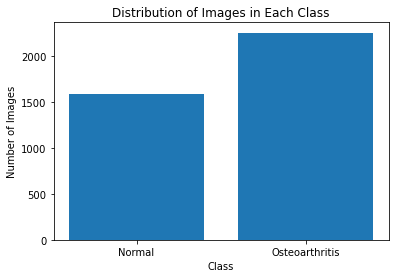

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Create a histogram to visualize the distribution of images in each class
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


2024-03-24 16:41:09.473410: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 16:41:09.605080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 16:41:09.605124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 16:41:09.636713: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-24 16:41:09.698289: I tensorflow/core/platform/cpu_feature_guar

Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257
Number of images in Normal class after augmentation: 2257


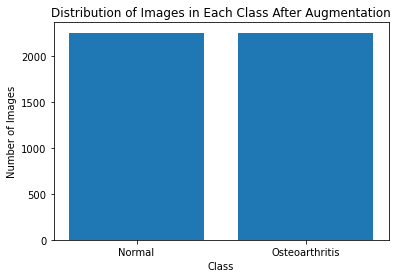

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Check if data augmentation is needed
if len(normal_images) < len(osteoarthritis_images):
    # Calculate the number of additional images needed
    num_additional_images = len(osteoarthritis_images) - len(normal_images)

    # Create an ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Choose random indices from the "Normal" class for augmentation
    sampled_indices = np.random.randint(0, len(normal_images), size=num_additional_images)

    # Perform data augmentation and append augmented images to the "Normal" class
    for index in sampled_indices:
        img = normal_images[index]
        img = img.reshape((1,) + img.shape)  # Reshape for flow() function
        for batch in datagen.flow(img, batch_size=1):
            normal_images.append(batch[0])  # Append augmented images
            break  # Exit the loop after one iteration of data augmentation

    # Display the number of images in the "Normal" class after augmentation
    print("Number of images in Normal class after augmentation:", len(normal_images))

# Create a histogram to visualize the distribution of images in each class after augmentation
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [3]:
import random

# Set a seed for reproducibility
random.seed(42)

# Randomly select 1000 images from each class
selected_normal_images = random.sample(normal_images, 500)
selected_osteoarthritis_images = random.sample(osteoarthritis_images, 500)

# Combine selected images from both classes
selected_images = selected_normal_images + selected_osteoarthritis_images
labels = [0] * 500 + [1] * 500  # Assign labels (0 for Normal, 1 for Osteoarthritis)

# Split the selected images and labels into train and test sets (70:30 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_images, labels, test_size=0.3, random_state=42)

# Split the train set into train and validation sets (80:20 ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of train, test, and validation sets
print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("X_validation size:", len(X_val))


X_train size: 560
X_test size: 300
X_validation size: 140


In [4]:
import cv2

def preprocess_image_cv2(image):
    # Resize image to (224, 224)
    resized_image = cv2.resize(image, (224, 224))
    # Scale pixel values to [0, 1]
    normalized_image = resized_image / 255.0
    return normalized_image

# Preprocess images in your dataset
X_train_preprocessed = np.array([preprocess_image_cv2(img) for img in X_train])
X_val_preprocessed = np.array([preprocess_image_cv2(img) for img in X_val])
X_test_preprocessed = np.array([preprocess_image_cv2(img) for img in X_test])

In [5]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef

# Denset201

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 26s 1s/step - loss: 0.6274 - accuracy: 0.6500 - val_loss: 0.5599 - val_accuracy: 0.7643
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 0.4843 - accuracy: 0.7946 - val_loss: 0.4932 - val_accuracy: 0.7857
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 0.4198 - accuracy: 0.8446 - val_loss: 0.4673 - val_accuracy: 0.8000
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 0.3981 - accuracy: 0.8357 - val_loss: 0.4483 - val_accuracy: 0.8071
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.3533 - accuracy: 0.8679 - val_loss: 0.4095 - val_accuracy: 0.8214
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.3288 - accuracy: 0.8643 - val_loss: 0.4233 - val_accuracy: 0.8071
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.3122 - accuracy: 0.8839 - val_loss: 0.3753 - val_accuracy: 0.8857
Epoch 8/50
18/18 [==

5/5 [==============================] - 4s 791ms/step
Inference Time: 4.217359304428101 seconds
10/10 [==============================] - 9s 886ms/step


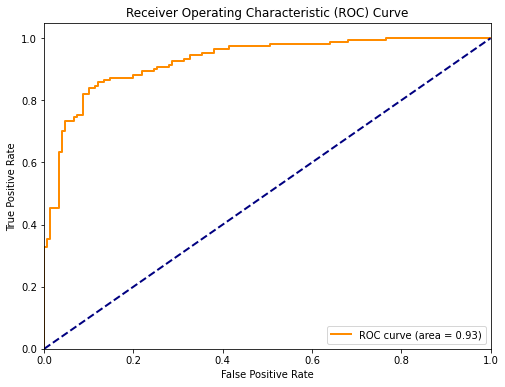

Validation Loss: 0.30383220314979553
Validation Accuracy: 0.8857142925262451
Test Loss: 0.3463142514228821
Test Accuracy: 0.8666666746139526
ROC AUC: 0.9276888888888889
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv', index=False)
print("Metrics saved successfully")

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 0.1304 - accuracy: 0.9768 - val_loss: 0.3032 - val_accuracy: 0.8857
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.1242 - accuracy: 0.9821 - val_loss: 0.3062 - val_accuracy: 0.9071
Epoch 3/100
18/18 [==============================] - 23s 1s/step - loss: 0.1263 - accuracy: 0.9786 - val_loss: 0.3004 - val_accuracy: 0.8714
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.1141 - accuracy: 0.9857 - val_loss: 0.3562 - val_accuracy: 0.8357
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.1145 - accuracy: 0.9821 - val_loss: 0.3113 - val_accuracy: 0.8571
Epoch 6/100
18/18 [==============================] - 23s 1s/step - loss: 0.1085 - accuracy: 0.9875 - val_loss: 0.3128 - val_accuracy: 0.8571
Epoch 7/100
18/18 [==============================] - 23s 1s/step - loss: 0.1062 - accuracy: 0.9857 - val_loss: 0.3055 - val_accuracy: 0.8571
Epoch 8/100
1

5/5 [==============================] - 4s 847ms/step
Inference Time: 4.488317966461182 seconds
10/10 [==============================] - 10s 950ms/step


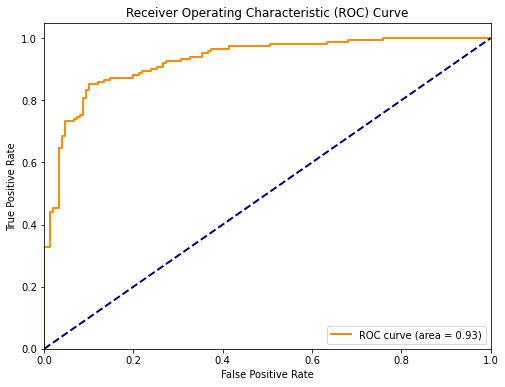

Validation Loss: 0.3003503382205963
Validation Accuracy: 0.8714285492897034
Test Loss: 0.3446824252605438
Test Accuracy: 0.8700000047683716
ROC AUC: 0.9280444444444444
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv', index=False)
print("Metrics saved successfully")

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 23s 1s/step - loss: 0.1178 - accuracy: 0.9786 - val_loss: 0.3052 - val_accuracy: 0.9000
Epoch 2/150
18/18 [==============================] - 23s 1s/step - loss: 0.1138 - accuracy: 0.9839 - val_loss: 0.3136 - val_accuracy: 0.8500
Epoch 3/150
18/18 [==============================] - 23s 1s/step - loss: 0.1141 - accuracy: 0.9714 - val_loss: 0.3019 - val_accuracy: 0.8786
Epoch 4/150
18/18 [==============================] - 23s 1s/step - loss: 0.1072 - accuracy: 0.9893 - val_loss: 0.3090 - val_accuracy: 0.9000
Epoch 5/150
18/18 [==============================] - 23s 1s/step - loss: 0.1031 - accuracy: 0.9839 - val_loss: 0.3015 - val_accuracy: 0.8857
Epoch 6/150
18/18 [==============================] - 23s 1s/step - loss: 0.0966 - accuracy: 0.9893 - val_loss: 0.3008 - val_accuracy: 0.8857
Epoch 7/150
18/18 [==============================] - 23s 1s/step - loss: 0.0952 - accuracy: 0.9911 - val_loss: 0.3051 - val_accuracy: 0.8571
Epoch 8/150
1

5/5 [==============================] - 4s 856ms/step
Inference Time: 4.5607287883758545 seconds
10/10 [==============================] - 10s 946ms/step


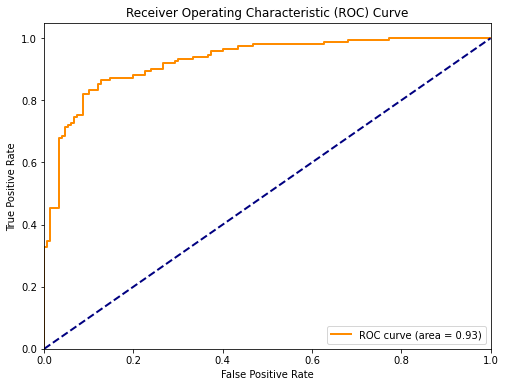

Validation Loss: 0.3007675111293793
Validation Accuracy: 0.8857142925262451
Test Loss: 0.35416722297668457
Test Accuracy: 0.8600000143051147
ROC AUC: 0.9272
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv', index=False)
print("Metrics saved successfully")

In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 23s 1s/step - loss: 0.0978 - accuracy: 0.9911 - val_loss: 0.3005 - val_accuracy: 0.8857
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.0941 - accuracy: 0.9875 - val_loss: 0.3347 - val_accuracy: 0.8571
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 0.0936 - accuracy: 0.9839 - val_loss: 0.3357 - val_accuracy: 0.8500
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 0.0835 - accuracy: 0.9911 - val_loss: 0.3131 - val_accuracy: 0.8500
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 0.0826 - accuracy: 0.9911 - val_loss: 0.3187 - val_accuracy: 0.8500
Epoch 6/200
18/18 [==============================] - 22s 1s/step - loss: 0.0852 - accuracy: 0.9929 - val_loss: 0.3335 - val_accuracy: 0.8571
Training Time: 134.6031789779663 seconds


5/5 [==============================] - 4s 855ms/step
Inference Time: 4.523251295089722 seconds
10/10 [==============================] - 10s 941ms/step


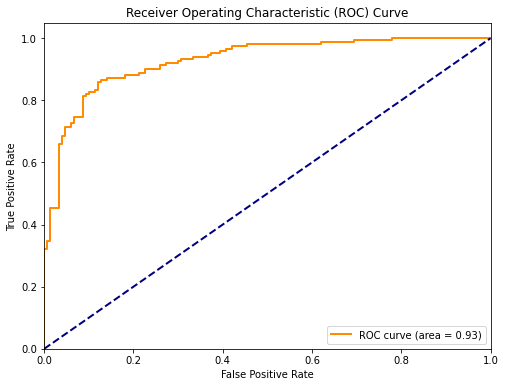

Validation Loss: 0.30052441358566284
Validation Accuracy: 0.8857142925262451
Test Loss: 0.35846367478370667
Test Accuracy: 0.8566666841506958
ROC AUC: 0.9270222222222222
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv', index=False)
print("Metrics saved successfully")

# Densenet+Dense

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Add an additional dense layer
x = Dense(512, activation='relu')(predictions)  # Example dense layer with 512 units

# Combine base model, custom classification head, and additional dense layer
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 27s 1s/step - loss: 4.5553 - accuracy: 0.0000e+00 - val_loss: 3.9609 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 4.4945 - accuracy: 0.0000e+00 - val_loss: 3.9399 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 4.4731 - accuracy: 0.0000e+00 - val_loss: 3.9231 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 4.4552 - accuracy: 0.0000e+00 - val_loss: 3.9087 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 4.4395 - accuracy: 0.0000e+00 - val_loss: 3.8961 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 4.4257 - accuracy: 0.0000e+00 - val_loss: 3.8846 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 4.4128 - accuracy: 0.0000e+00 - val_loss

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
 7/18 [==========>...................] - ETA: 10s - loss: 4.5815 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
 5/18 [=======>......................] - ETA: 12s - loss: 4.0732 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Dropout(1)+Dense(2)

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Add first dense layer
x = Dense(512, activation='relu')(x)

# Add dropout layer
x = Dropout(0.5)(x)  # Adding dropout with rate 0.5

# Add second dense layer
x = Dense(256, activation='relu')(x)

predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_4[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 26s 1s/step - loss: 0.6981 - accuracy: 0.5589 - val_loss: 0.6372 - val_accuracy: 0.6571
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 0.5842 - accuracy: 0.6821 - val_loss: 0.5906 - val_accuracy: 0.6786
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 0.5093 - accuracy: 0.7625 - val_loss: 0.4835 - val_accuracy: 0.7786
Epoch 4/50
18/18 [==============================] - 21s 1s/step - loss: 0.4675 - accuracy: 0.7821 - val_loss: 0.4332 - val_accuracy: 0.8000
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.3981 - accuracy: 0.8161 - val_loss: 0.4310 - val_accuracy: 0.7857
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.3803 - accuracy: 0.8214 - val_loss: 0.4050 - val_accuracy: 0.8286
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.3301 - accuracy: 0.8607 - val_loss: 0.3776 - val_accuracy: 0.8357
Epoch 8/50
18/18 [==

5/5 [==============================] - 5s 846ms/step
Inference Time: 5.5073089599609375 seconds
10/10 [==============================] - 9s 933ms/step


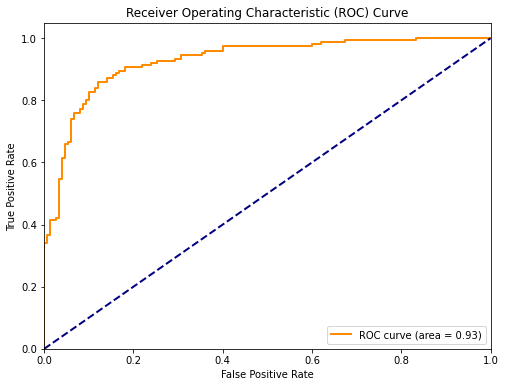

Validation Loss: 0.3157847225666046
Validation Accuracy: 0.8785714507102966
Test Loss: 0.3637738823890686
Test Accuracy: 0.8600000143051147
ROC AUC: 0.9272888888888889
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [29]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 0.1626 - accuracy: 0.9482 - val_loss: 0.3525 - val_accuracy: 0.8571
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.1324 - accuracy: 0.9446 - val_loss: 0.3380 - val_accuracy: 0.9143
Epoch 3/100
18/18 [==============================] - 22s 1s/step - loss: 0.1253 - accuracy: 0.9554 - val_loss: 0.4204 - val_accuracy: 0.8500
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.1238 - accuracy: 0.9625 - val_loss: 0.3396 - val_accuracy: 0.8786
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.1123 - accuracy: 0.9607 - val_loss: 0.5138 - val_accuracy: 0.8286
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.1267 - accuracy: 0.9464 - val_loss: 0.3782 - val_accuracy: 0.8786
Epoch 7/100
18/18 [==============================] - 22s 1s/step - loss: 0.0832 - accuracy: 0.9804 - val_loss: 0.3813 - val_accuracy: 0.8929
Training Time

5/5 [==============================] - 4s 845ms/step
Inference Time: 4.481879711151123 seconds
10/10 [==============================] - 9s 933ms/step


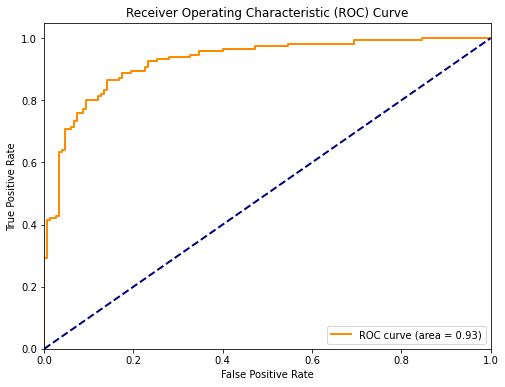

Validation Loss: 0.33795928955078125
Validation Accuracy: 0.9142857193946838
Test Loss: 0.43762150406837463
Test Accuracy: 0.8399999737739563
ROC AUC: 0.9253333333333332
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 22s 1s/step - loss: 0.1315 - accuracy: 0.9446 - val_loss: 0.3242 - val_accuracy: 0.8857
Epoch 2/150
18/18 [==============================] - 22s 1s/step - loss: 0.1009 - accuracy: 0.9714 - val_loss: 0.3643 - val_accuracy: 0.8714
Epoch 3/150
18/18 [==============================] - 22s 1s/step - loss: 0.0900 - accuracy: 0.9750 - val_loss: 0.3628 - val_accuracy: 0.8786
Epoch 4/150
18/18 [==============================] - 22s 1s/step - loss: 0.0796 - accuracy: 0.9750 - val_loss: 0.4019 - val_accuracy: 0.8643
Epoch 5/150
18/18 [==============================] - 22s 1s/step - loss: 0.0730 - accuracy: 0.9821 - val_loss: 0.3688 - val_accuracy: 0.8643
Epoch 6/150
18/18 [==============================] - 22s 1s/step - loss: 0.0700 - accuracy: 0.9804 - val_loss: 0.3633 - val_accuracy: 0.8571
Training Time: 132.63729643821716 seconds


5/5 [==============================] - 4s 838ms/step
Inference Time: 4.437673330307007 seconds
10/10 [==============================] - 9s 935ms/step


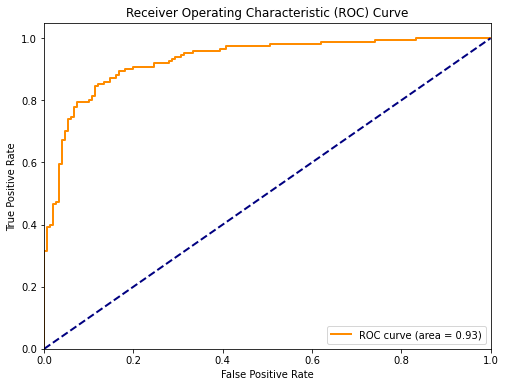

Validation Loss: 0.3241617679595947
Validation Accuracy: 0.8857142925262451
Test Loss: 0.37937700748443604
Test Accuracy: 0.8633333444595337
ROC AUC: 0.9296444444444444
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [33]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 22s 1s/step - loss: 0.1080 - accuracy: 0.9679 - val_loss: 0.3958 - val_accuracy: 0.8571
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.1109 - accuracy: 0.9661 - val_loss: 0.3453 - val_accuracy: 0.9071
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 0.0800 - accuracy: 0.9768 - val_loss: 0.3991 - val_accuracy: 0.8571
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 0.0761 - accuracy: 0.9786 - val_loss: 0.3625 - val_accuracy: 0.9000
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 0.0663 - accuracy: 0.9821 - val_loss: 0.3568 - val_accuracy: 0.8929
Epoch 6/200
18/18 [==============================] - 21s 1s/step - loss: 0.0534 - accuracy: 0.9929 - val_loss: 0.3641 - val_accuracy: 0.8929
Epoch 7/200
18/18 [==============================] - 22s 1s/step - loss: 0.0458 - accuracy: 0.9964 - val_loss: 0.3939 - val_accuracy: 0.8857
Training Time

5/5 [==============================] - 4s 823ms/step
Inference Time: 4.368932723999023 seconds
10/10 [==============================] - 9s 909ms/step


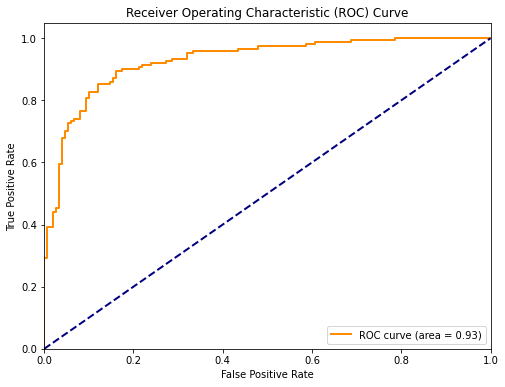

Validation Loss: 0.34526586532592773
Validation Accuracy: 0.9071428775787354
Test Loss: 0.43155309557914734
Test Accuracy: 0.8533333539962769
ROC AUC: 0.9275555555555556
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Dropout(1)+Dense(1)

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Add dense layer
x = Dense(512, activation='relu')(x)

# Add dropout layer
x = Dropout(0.5)(x)  # Adding dropout with rate 0.5

predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_6 (ZeroPadd  (None, 230, 230, 3)          0         ['input_4[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_6[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [36]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 25s 1s/step - loss: 0.6405 - accuracy: 0.6232 - val_loss: 0.5718 - val_accuracy: 0.7143
Epoch 2/50
18/18 [==============================] - 21s 1s/step - loss: 0.5208 - accuracy: 0.7518 - val_loss: 0.5115 - val_accuracy: 0.7714
Epoch 3/50
18/18 [==============================] - 21s 1s/step - loss: 0.4435 - accuracy: 0.8018 - val_loss: 0.4574 - val_accuracy: 0.8286
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 0.4162 - accuracy: 0.8161 - val_loss: 0.4539 - val_accuracy: 0.7857
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.3537 - accuracy: 0.8536 - val_loss: 0.4004 - val_accuracy: 0.8643
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.3353 - accuracy: 0.8429 - val_loss: 0.3902 - val_accuracy: 0.8500
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.3049 - accuracy: 0.8839 - val_loss: 0.3777 - val_accuracy: 0.8500
Epoch 8/50
18/18 [==

5/5 [==============================] - 5s 839ms/step
Inference Time: 5.469902992248535 seconds
10/10 [==============================] - 9s 935ms/step


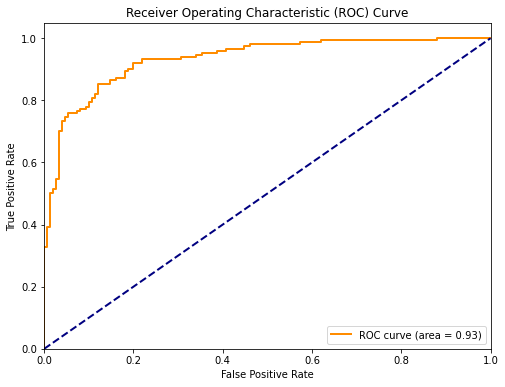

Validation Loss: 0.31392741203308105
Validation Accuracy: 0.9071428775787354
Test Loss: 0.37842878699302673
Test Accuracy: 0.846666693687439
ROC AUC: 0.9326666666666666
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [38]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 0.1042 - accuracy: 0.9661 - val_loss: 0.3511 - val_accuracy: 0.8500
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.0945 - accuracy: 0.9768 - val_loss: 0.3218 - val_accuracy: 0.8929
Epoch 3/100
18/18 [==============================] - 22s 1s/step - loss: 0.0833 - accuracy: 0.9857 - val_loss: 0.3264 - val_accuracy: 0.8714
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.0748 - accuracy: 0.9893 - val_loss: 0.3235 - val_accuracy: 0.8786
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.0679 - accuracy: 0.9875 - val_loss: 0.3276 - val_accuracy: 0.8714
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.0617 - accuracy: 0.9893 - val_loss: 0.3262 - val_accuracy: 0.8857
Epoch 7/100
18/18 [==============================] - 22s 1s/step - loss: 0.0565 - accuracy: 0.9964 - val_loss: 0.3610 - val_accuracy: 0.8643
Training Time

5/5 [==============================] - 4s 820ms/step
Inference Time: 4.343585252761841 seconds
10/10 [==============================] - 9s 913ms/step


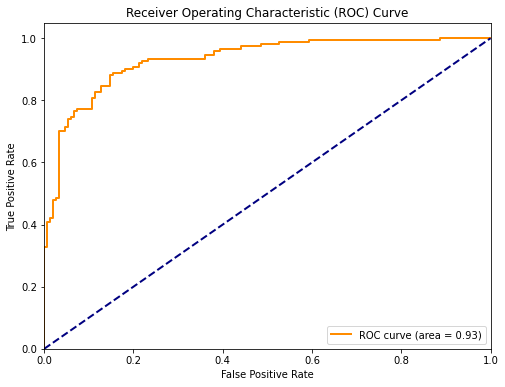

Validation Loss: 0.3218301832675934
Validation Accuracy: 0.8928571343421936
Test Loss: 0.36612367630004883
Test Accuracy: 0.8433333039283752
ROC AUC: 0.9306666666666668
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 22s 1s/step - loss: 0.0981 - accuracy: 0.9732 - val_loss: 0.3290 - val_accuracy: 0.8714
Epoch 2/150
18/18 [==============================] - 22s 1s/step - loss: 0.0800 - accuracy: 0.9839 - val_loss: 0.3471 - val_accuracy: 0.8643
Epoch 3/150
18/18 [==============================] - 22s 1s/step - loss: 0.0666 - accuracy: 0.9911 - val_loss: 0.3229 - val_accuracy: 0.8714
Epoch 4/150
18/18 [==============================] - 22s 1s/step - loss: 0.0603 - accuracy: 0.9929 - val_loss: 0.3492 - val_accuracy: 0.8714
Epoch 5/150
18/18 [==============================] - 22s 1s/step - loss: 0.0655 - accuracy: 0.9929 - val_loss: 0.3302 - val_accuracy: 0.9000
Epoch 6/150
18/18 [==============================] - 22s 1s/step - loss: 0.0585 - accuracy: 0.9893 - val_loss: 0.3348 - val_accuracy: 0.8714
Epoch 7/150
18/18 [==============================] - 22s 1s/step - loss: 0.0450 - accuracy: 0.9964 - val_loss: 0.3342 - val_accuracy: 0.8786
Epoch 8/150
1

5/5 [==============================] - 4s 841ms/step
Inference Time: 4.445308208465576 seconds
10/10 [==============================] - 9s 937ms/step


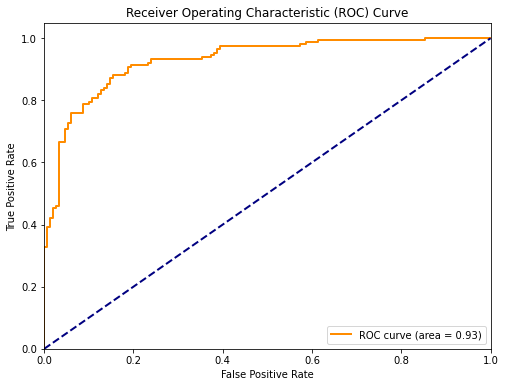

Validation Loss: 0.32285141944885254
Validation Accuracy: 0.8714285492897034
Test Loss: 0.37633487582206726
Test Accuracy: 0.8500000238418579
ROC AUC: 0.9284888888888888
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [42]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 22s 1s/step - loss: 0.0648 - accuracy: 0.9946 - val_loss: 0.3226 - val_accuracy: 0.8786
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.0611 - accuracy: 0.9875 - val_loss: 0.3436 - val_accuracy: 0.8643
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 0.0518 - accuracy: 0.9946 - val_loss: 0.3934 - val_accuracy: 0.8571
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 0.0507 - accuracy: 0.9929 - val_loss: 0.3527 - val_accuracy: 0.8643
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 0.0441 - accuracy: 0.9964 - val_loss: 0.3488 - val_accuracy: 0.8786
Epoch 6/200
18/18 [==============================] - 22s 1s/step - loss: 0.0383 - accuracy: 0.9982 - val_loss: 0.3644 - val_accuracy: 0.8643
Training Time: 132.34792232513428 seconds


5/5 [==============================] - 4s 840ms/step
Inference Time: 4.451165676116943 seconds
10/10 [==============================] - 9s 930ms/step


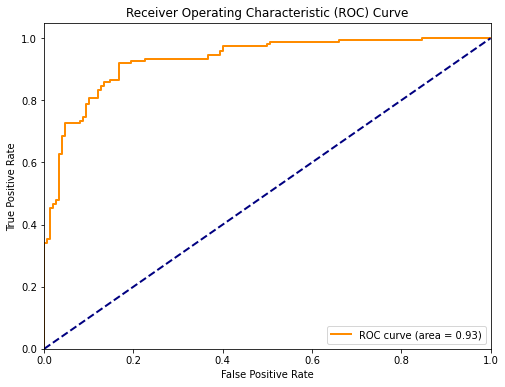

Validation Loss: 0.3226064443588257
Validation Accuracy: 0.8785714507102966
Test Loss: 0.3969055712223053
Test Accuracy: 0.8533333539962769
ROC AUC: 0.9298222222222222
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+GlobalAveragePooling+Dense

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add additional dense layer
x = Dense(1024, activation='relu')(x)

# Add one more dense layer if needed
# x = Dense(512, activation='relu')(x)

# Add final prediction layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_8 (ZeroPadd  (None, 230, 230, 3)          0         ['input_5[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_8[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [45]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 25s 1s/step - loss: 0.6627 - accuracy: 0.5911 - val_loss: 0.5821 - val_accuracy: 0.6786
Epoch 2/50
18/18 [==============================] - 21s 1s/step - loss: 0.5089 - accuracy: 0.7875 - val_loss: 0.4968 - val_accuracy: 0.7786
Epoch 3/50
18/18 [==============================] - 21s 1s/step - loss: 0.4493 - accuracy: 0.8107 - val_loss: 0.4611 - val_accuracy: 0.8286
Epoch 4/50
18/18 [==============================] - 21s 1s/step - loss: 0.4034 - accuracy: 0.8304 - val_loss: 0.4322 - val_accuracy: 0.8357
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.3724 - accuracy: 0.8554 - val_loss: 0.4092 - val_accuracy: 0.8571
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.3408 - accuracy: 0.8679 - val_loss: 0.4019 - val_accuracy: 0.8571
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.3257 - accuracy: 0.8786 - val_loss: 0.3875 - val_accuracy: 0.8571
Epoch 8/50
18/18 [==

5/5 [==============================] - 6s 843ms/step
Inference Time: 6.135060548782349 seconds
10/10 [==============================] - 9s 931ms/step


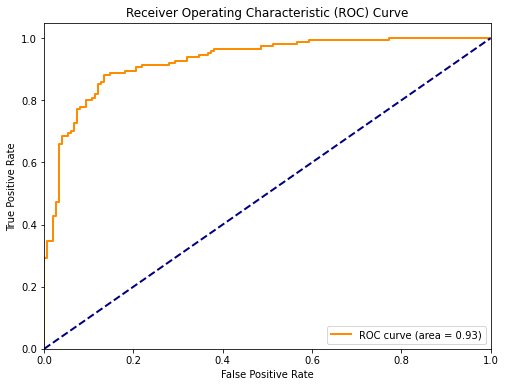

Validation Loss: 0.3098224103450775
Validation Accuracy: 0.9142857193946838
Test Loss: 0.3658739924430847
Test Accuracy: 0.846666693687439
ROC AUC: 0.9276
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [47]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 0.1624 - accuracy: 0.9589 - val_loss: 0.3113 - val_accuracy: 0.9143
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.1555 - accuracy: 0.9625 - val_loss: 0.3094 - val_accuracy: 0.8786
Epoch 3/100
18/18 [==============================] - 22s 1s/step - loss: 0.1481 - accuracy: 0.9679 - val_loss: 0.3207 - val_accuracy: 0.8643
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.1447 - accuracy: 0.9732 - val_loss: 0.3142 - val_accuracy: 0.8714
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.1387 - accuracy: 0.9714 - val_loss: 0.2995 - val_accuracy: 0.8714
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.1475 - accuracy: 0.9679 - val_loss: 0.3328 - val_accuracy: 0.8571
Epoch 7/100
18/18 [==============================] - 22s 1s/step - loss: 0.1327 - accuracy: 0.9679 - val_loss: 0.3137 - val_accuracy: 0.8714
Epoch 8/100
1

5/5 [==============================] - 4s 844ms/step
Inference Time: 4.451977729797363 seconds
10/10 [==============================] - 10s 943ms/step


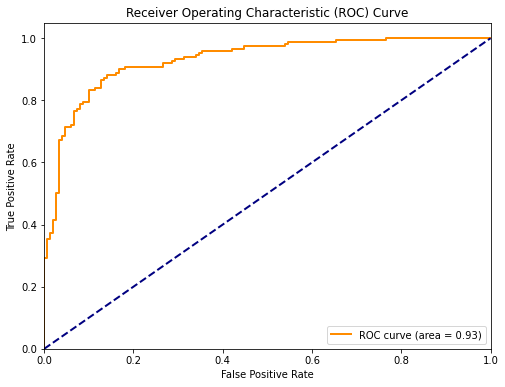

Validation Loss: 0.2995396852493286
Validation Accuracy: 0.8714285492897034
Test Loss: 0.34001797437667847
Test Accuracy: 0.8600000143051147
ROC AUC: 0.9296444444444444
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [49]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 22s 1s/step - loss: 0.1311 - accuracy: 0.9732 - val_loss: 0.3061 - val_accuracy: 0.8714
Epoch 2/150
18/18 [==============================] - 22s 1s/step - loss: 0.1326 - accuracy: 0.9750 - val_loss: 0.3112 - val_accuracy: 0.8714
Epoch 3/150
18/18 [==============================] - 22s 1s/step - loss: 0.1269 - accuracy: 0.9768 - val_loss: 0.2991 - val_accuracy: 0.8786
Epoch 4/150
18/18 [==============================] - 22s 1s/step - loss: 0.1193 - accuracy: 0.9821 - val_loss: 0.3058 - val_accuracy: 0.8714
Epoch 5/150
18/18 [==============================] - 22s 1s/step - loss: 0.1168 - accuracy: 0.9821 - val_loss: 0.3147 - val_accuracy: 0.8714
Epoch 6/150
18/18 [==============================] - 22s 1s/step - loss: 0.1141 - accuracy: 0.9804 - val_loss: 0.3042 - val_accuracy: 0.8786
Epoch 7/150
18/18 [==============================] - 22s 1s/step - loss: 0.1103 - accuracy: 0.9839 - val_loss: 0.3009 - val_accuracy: 0.8714
Epoch 8/150
1

5/5 [==============================] - 4s 843ms/step
Inference Time: 4.472493886947632 seconds
10/10 [==============================] - 9s 930ms/step


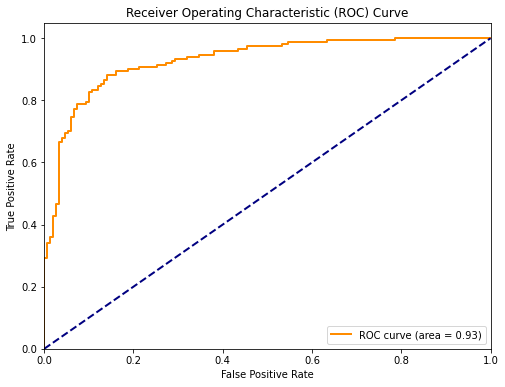

Validation Loss: 0.2990669012069702
Validation Accuracy: 0.8785714507102966
Test Loss: 0.34637537598609924
Test Accuracy: 0.8600000143051147
ROC AUC: 0.9282666666666666
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [51]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 22s 1s/step - loss: 0.1196 - accuracy: 0.9750 - val_loss: 0.3191 - val_accuracy: 0.8571
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.1170 - accuracy: 0.9839 - val_loss: 0.3118 - val_accuracy: 0.8714
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 0.1103 - accuracy: 0.9839 - val_loss: 0.3058 - val_accuracy: 0.8714
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 0.1075 - accuracy: 0.9839 - val_loss: 0.3046 - val_accuracy: 0.8714
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 0.1049 - accuracy: 0.9857 - val_loss: 0.3040 - val_accuracy: 0.8714
Epoch 6/200
18/18 [==============================] - 22s 1s/step - loss: 0.1012 - accuracy: 0.9857 - val_loss: 0.3023 - val_accuracy: 0.8714
Epoch 7/200
18/18 [==============================] - 22s 1s/step - loss: 0.0970 - accuracy: 0.9911 - val_loss: 0.2997 - val_accuracy: 0.8929
Epoch 8/200
1

5/5 [==============================] - 4s 846ms/step
Inference Time: 4.467433929443359 seconds
10/10 [==============================] - 9s 932ms/step


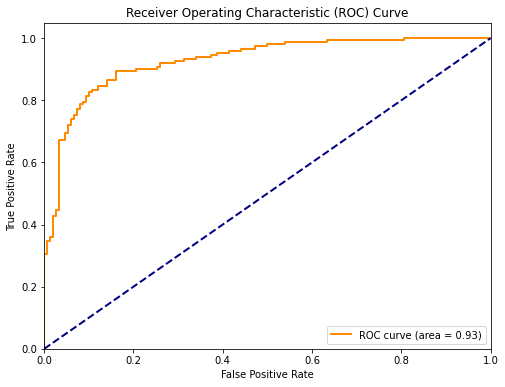

Validation Loss: 0.2996601164340973
Validation Accuracy: 0.8928571343421936
Test Loss: 0.3544413149356842
Test Accuracy: 0.8600000143051147
ROC AUC: 0.926711111111111
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add additional layers
x = base_model.output

# Add Conv2D layer
x = Conv2D(64, (3, 3), activation='relu')(x)

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layer
x = Dense(1024, activation='relu')(x)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_10 (ZeroPad  (None, 230, 230, 3)          0         ['input_6[0][0]']             
 ding2D)                                                                                          
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_10[0][0]']   
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [54]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 26s 1s/step - loss: 0.6503 - accuracy: 0.5964 - val_loss: 0.5921 - val_accuracy: 0.7357
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 0.5589 - accuracy: 0.7054 - val_loss: 0.4966 - val_accuracy: 0.7786
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 0.5036 - accuracy: 0.7393 - val_loss: 0.4458 - val_accuracy: 0.8214
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 0.4393 - accuracy: 0.7946 - val_loss: 0.4031 - val_accuracy: 0.8571
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.4022 - accuracy: 0.8125 - val_loss: 0.3931 - val_accuracy: 0.8500
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.3730 - accuracy: 0.8411 - val_loss: 0.3584 - val_accuracy: 0.8714
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.3484 - accuracy: 0.8375 - val_loss: 0.3590 - val_accuracy: 0.8857
Epoch 8/50
18/18 [==

5/5 [==============================] - 6s 855ms/step
Inference Time: 6.146787405014038 seconds
10/10 [==============================] - 10s 950ms/step


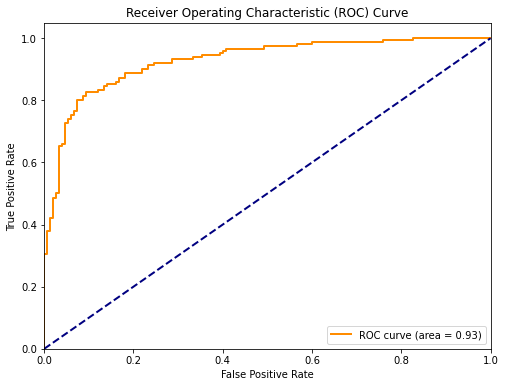

Validation Loss: 0.3148888945579529
Validation Accuracy: 0.8999999761581421
Test Loss: 0.3711435794830322
Test Accuracy: 0.8600000143051147
ROC AUC: 0.9266222222222222
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [56]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 0.1757 - accuracy: 0.9268 - val_loss: 0.3613 - val_accuracy: 0.8714
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.1846 - accuracy: 0.9304 - val_loss: 0.3330 - val_accuracy: 0.8786
Epoch 3/100
18/18 [==============================] - 22s 1s/step - loss: 0.1639 - accuracy: 0.9321 - val_loss: 0.4015 - val_accuracy: 0.8500
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.1650 - accuracy: 0.9375 - val_loss: 0.3174 - val_accuracy: 0.8929
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.1429 - accuracy: 0.9464 - val_loss: 0.3483 - val_accuracy: 0.8643
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.1297 - accuracy: 0.9643 - val_loss: 0.3878 - val_accuracy: 0.8571
Epoch 7/100
18/18 [==============================] - 22s 1s/step - loss: 0.1285 - accuracy: 0.9607 - val_loss: 0.3233 - val_accuracy: 0.9000
Epoch 8/100
1

5/5 [==============================] - 4s 842ms/step
Inference Time: 4.4785332679748535 seconds
10/10 [==============================] - 9s 935ms/step


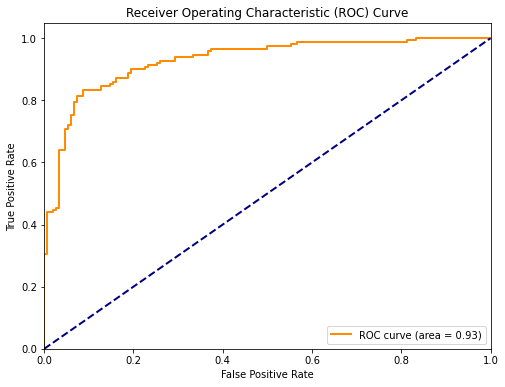

Validation Loss: 0.317361056804657
Validation Accuracy: 0.8928571343421936
Test Loss: 0.38072165846824646
Test Accuracy: 0.8733333349227905
ROC AUC: 0.9282222222222222
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [58]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 22s 1s/step - loss: 0.1335 - accuracy: 0.9518 - val_loss: 0.3579 - val_accuracy: 0.8714
Epoch 2/150
18/18 [==============================] - 22s 1s/step - loss: 0.1378 - accuracy: 0.9536 - val_loss: 0.3540 - val_accuracy: 0.8786
Epoch 3/150
18/18 [==============================] - 22s 1s/step - loss: 0.1285 - accuracy: 0.9571 - val_loss: 0.3488 - val_accuracy: 0.8643
Epoch 4/150
18/18 [==============================] - 22s 1s/step - loss: 0.1146 - accuracy: 0.9554 - val_loss: 0.3713 - val_accuracy: 0.8571
Epoch 5/150
18/18 [==============================] - 22s 1s/step - loss: 0.1088 - accuracy: 0.9607 - val_loss: 0.3569 - val_accuracy: 0.8786
Epoch 6/150
18/18 [==============================] - 22s 1s/step - loss: 0.1173 - accuracy: 0.9607 - val_loss: 0.3337 - val_accuracy: 0.8786
Epoch 7/150
18/18 [==============================] - 22s 1s/step - loss: 0.0960 - accuracy: 0.9679 - val_loss: 0.3648 - val_accuracy: 0.8643
Epoch 8/150
1

5/5 [==============================] - 4s 843ms/step
Inference Time: 4.469435930252075 seconds
10/10 [==============================] - 9s 934ms/step


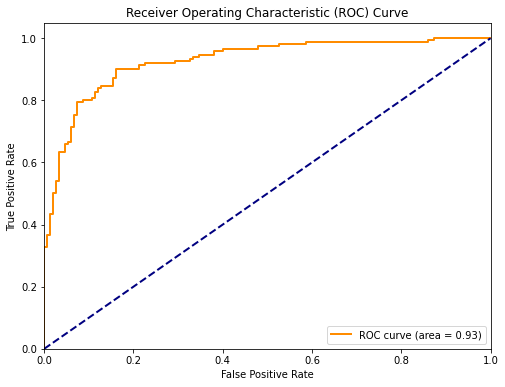

Validation Loss: 0.31914007663726807
Validation Accuracy: 0.8999999761581421
Test Loss: 0.437393456697464
Test Accuracy: 0.8533333539962769
ROC AUC: 0.9260444444444444
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [60]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 22s 1s/step - loss: 0.0969 - accuracy: 0.9661 - val_loss: 0.3241 - val_accuracy: 0.9000
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.0812 - accuracy: 0.9786 - val_loss: 0.3727 - val_accuracy: 0.8643
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 0.0811 - accuracy: 0.9679 - val_loss: 0.3439 - val_accuracy: 0.8786
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 0.0770 - accuracy: 0.9804 - val_loss: 0.3703 - val_accuracy: 0.8714
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 0.0554 - accuracy: 0.9839 - val_loss: 0.3686 - val_accuracy: 0.8929
Epoch 6/200
18/18 [==============================] - 22s 1s/step - loss: 0.0594 - accuracy: 0.9839 - val_loss: 0.3507 - val_accuracy: 0.8786
Training Time: 132.3200809955597 seconds


5/5 [==============================] - 4s 850ms/step
Inference Time: 4.515991687774658 seconds
10/10 [==============================] - 10s 944ms/step


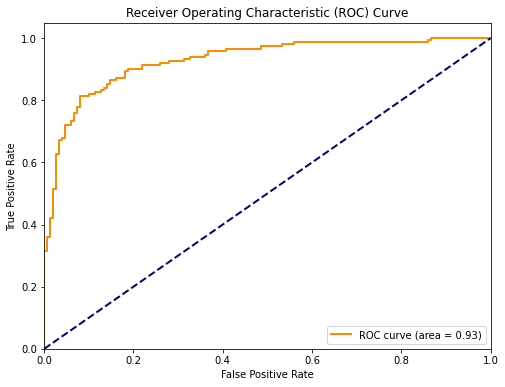

Validation Loss: 0.32409411668777466
Validation Accuracy: 0.8999999761581421
Test Loss: 0.4305771291255951
Test Accuracy: 0.8566666841506958
ROC AUC: 0.9278666666666666
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+LSTM+Dense

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Global average pooling
x = GlobalAveragePooling2D()(x)

# Reshape to fit LSTM input
x = tf.expand_dims(x, axis=1)

# LSTM layer
x = LSTM(64)(x)

# Dense layer
x = Dense(1024, activation='relu')(x)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_12 (ZeroPad  (None, 230, 230, 3)          0         ['input_7[0][0]']             
 ding2D)                                                                                          
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_12[0][0]']   
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [63]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 27s 1s/step - loss: 0.6898 - accuracy: 0.5446 - val_loss: 0.6896 - val_accuracy: 0.5143
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 0.6732 - accuracy: 0.6357 - val_loss: 0.6765 - val_accuracy: 0.6143
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 0.6467 - accuracy: 0.7286 - val_loss: 0.6521 - val_accuracy: 0.6857
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 0.6018 - accuracy: 0.7536 - val_loss: 0.6149 - val_accuracy: 0.7071
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.5426 - accuracy: 0.7661 - val_loss: 0.5549 - val_accuracy: 0.7643
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.4840 - accuracy: 0.8089 - val_loss: 0.5028 - val_accuracy: 0.7857
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.4253 - accuracy: 0.8143 - val_loss: 0.4750 - val_accuracy: 0.7929
Epoch 8/50
18/18 [==

5/5 [==============================] - 6s 841ms/step
Inference Time: 6.315067291259766 seconds
10/10 [==============================] - 9s 933ms/step


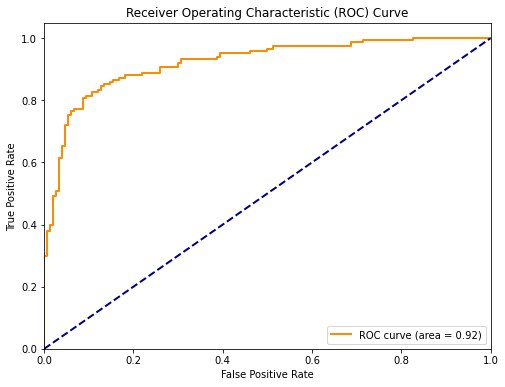

Validation Loss: 0.32732629776000977
Validation Accuracy: 0.8857142925262451
Test Loss: 0.3776778280735016
Test Accuracy: 0.8566666841506958
ROC AUC: 0.9212444444444445
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [65]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 0.1395 - accuracy: 0.9589 - val_loss: 0.3715 - val_accuracy: 0.8500
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.1382 - accuracy: 0.9536 - val_loss: 0.3596 - val_accuracy: 0.8500
Epoch 3/100
18/18 [==============================] - 22s 1s/step - loss: 0.1306 - accuracy: 0.9607 - val_loss: 0.3407 - val_accuracy: 0.8571
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.1201 - accuracy: 0.9571 - val_loss: 0.3550 - val_accuracy: 0.8500
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.1192 - accuracy: 0.9643 - val_loss: 0.3863 - val_accuracy: 0.8429
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.1110 - accuracy: 0.9625 - val_loss: 0.3746 - val_accuracy: 0.8500
Epoch 7/100
18/18 [==============================] - 22s 1s/step - loss: 0.1072 - accuracy: 0.9786 - val_loss: 0.3714 - val_accuracy: 0.8500
Epoch 8/100
1

5/5 [==============================] - 4s 845ms/step
Inference Time: 4.476402044296265 seconds
10/10 [==============================] - 9s 932ms/step


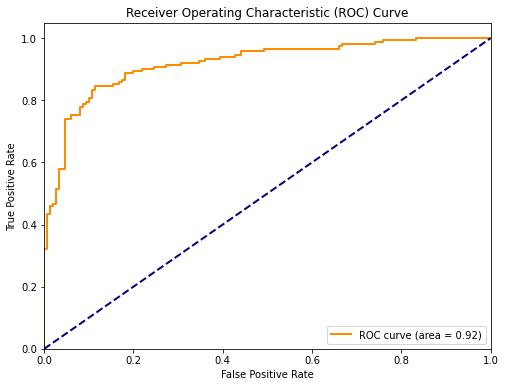

Validation Loss: 0.33938610553741455
Validation Accuracy: 0.8999999761581421
Test Loss: 0.4333663284778595
Test Accuracy: 0.8500000238418579
ROC AUC: 0.9190666666666668
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [67]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 22s 1s/step - loss: 0.0941 - accuracy: 0.9786 - val_loss: 0.3383 - val_accuracy: 0.8786
Epoch 2/150
18/18 [==============================] - 22s 1s/step - loss: 0.0858 - accuracy: 0.9750 - val_loss: 0.3620 - val_accuracy: 0.8571
Epoch 3/150
18/18 [==============================] - 22s 1s/step - loss: 0.0816 - accuracy: 0.9839 - val_loss: 0.3496 - val_accuracy: 0.8857
Epoch 4/150
18/18 [==============================] - 22s 1s/step - loss: 0.0744 - accuracy: 0.9839 - val_loss: 0.3399 - val_accuracy: 0.8857
Epoch 5/150
18/18 [==============================] - 22s 1s/step - loss: 0.0715 - accuracy: 0.9839 - val_loss: 0.3448 - val_accuracy: 0.8786
Epoch 6/150
18/18 [==============================] - 22s 1s/step - loss: 0.0757 - accuracy: 0.9839 - val_loss: 0.3470 - val_accuracy: 0.8786
Training Time: 132.0042064189911 seconds


5/5 [==============================] - 4s 850ms/step
Inference Time: 4.490736484527588 seconds
10/10 [==============================] - 9s 935ms/step


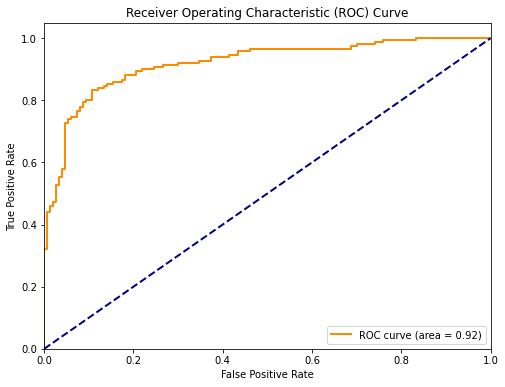

Validation Loss: 0.33833470940589905
Validation Accuracy: 0.8785714507102966
Test Loss: 0.4293680787086487
Test Accuracy: 0.8600000143051147
ROC AUC: 0.9189333333333334
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [69]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 22s 1s/step - loss: 0.0907 - accuracy: 0.9732 - val_loss: 0.3470 - val_accuracy: 0.8643
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.0804 - accuracy: 0.9804 - val_loss: 0.3598 - val_accuracy: 0.8714
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 0.0785 - accuracy: 0.9839 - val_loss: 0.3437 - val_accuracy: 0.8857
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 0.0729 - accuracy: 0.9857 - val_loss: 0.3478 - val_accuracy: 0.8714
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 0.0660 - accuracy: 0.9875 - val_loss: 0.3454 - val_accuracy: 0.8857
Epoch 6/200
18/18 [==============================] - 22s 1s/step - loss: 0.0638 - accuracy: 0.9911 - val_loss: 0.3536 - val_accuracy: 0.8714
Epoch 7/200
18/18 [==============================] - 22s 1s/step - loss: 0.0586 - accuracy: 0.9911 - val_loss: 0.3530 - val_accuracy: 0.8643
Epoch 8/200
1

5/5 [==============================] - 4s 840ms/step
Inference Time: 4.453009366989136 seconds
10/10 [==============================] - 9s 930ms/step


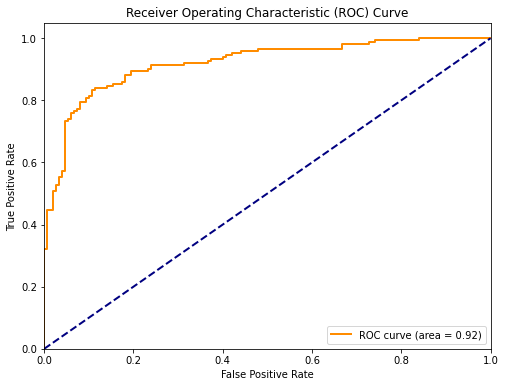

Validation Loss: 0.34370216727256775
Validation Accuracy: 0.8857142925262451
Test Loss: 0.4339251220226288
Test Accuracy: 0.8566666841506958
ROC AUC: 0.9197333333333334
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+GRU+Dense

In [71]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Global average pooling
x = GlobalAveragePooling2D()(x)

# Reshape to fit GRU input
x = tf.expand_dims(x, axis=1)

# GRU layer
x = GRU(64)(x)

# Dense layer
x = Dense(1024, activation='relu')(x)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_14 (ZeroPad  (None, 230, 230, 3)          0         ['input_8[0][0]']             
 ding2D)                                                                                          
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_14[0][0]']   
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [72]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 27s 1s/step - loss: 0.6849 - accuracy: 0.5446 - val_loss: 0.6784 - val_accuracy: 0.6429
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 0.6520 - accuracy: 0.7232 - val_loss: 0.6541 - val_accuracy: 0.6500
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 0.6105 - accuracy: 0.7446 - val_loss: 0.6182 - val_accuracy: 0.6929
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 0.5576 - accuracy: 0.7750 - val_loss: 0.5666 - val_accuracy: 0.7286
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 0.4974 - accuracy: 0.8000 - val_loss: 0.5029 - val_accuracy: 0.7857
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.4383 - accuracy: 0.8179 - val_loss: 0.4821 - val_accuracy: 0.7786
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.3908 - accuracy: 0.8357 - val_loss: 0.4279 - val_accuracy: 0.8143
Epoch 8/50
18/18 [==

5/5 [==============================] - 6s 843ms/step
Inference Time: 5.611697673797607 seconds
10/10 [==============================] - 9s 929ms/step


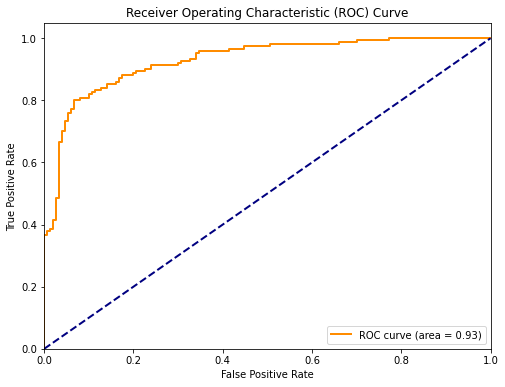

Validation Loss: 0.31923264265060425
Validation Accuracy: 0.8928571343421936
Test Loss: 0.3647894263267517
Test Accuracy: 0.8566666841506958
ROC AUC: 0.9278666666666667
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [74]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 0.1387 - accuracy: 0.9554 - val_loss: 0.3318 - val_accuracy: 0.8643
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 0.1309 - accuracy: 0.9571 - val_loss: 0.3227 - val_accuracy: 0.8929
Epoch 3/100
18/18 [==============================] - 22s 1s/step - loss: 0.1268 - accuracy: 0.9554 - val_loss: 0.3533 - val_accuracy: 0.8500
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.1217 - accuracy: 0.9643 - val_loss: 0.3316 - val_accuracy: 0.8929
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 0.1138 - accuracy: 0.9643 - val_loss: 0.3284 - val_accuracy: 0.8786
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.1081 - accuracy: 0.9696 - val_loss: 0.3280 - val_accuracy: 0.8929
Epoch 7/100
18/18 [==============================] - 22s 1s/step - loss: 0.1059 - accuracy: 0.9625 - val_loss: 0.3493 - val_accuracy: 0.8714
Training Time

5/5 [==============================] - 4s 845ms/step
Inference Time: 4.484161138534546 seconds
10/10 [==============================] - 9s 931ms/step


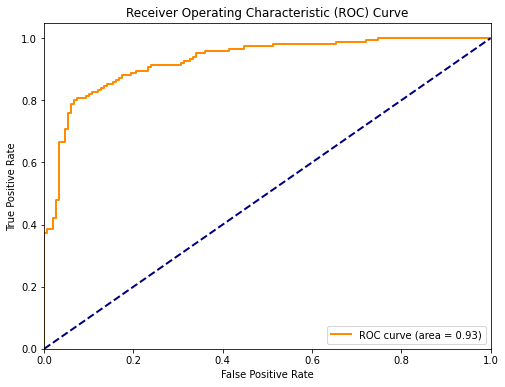

Validation Loss: 0.3226695954799652
Validation Accuracy: 0.8928571343421936
Test Loss: 0.3670599162578583
Test Accuracy: 0.8566666841506958
ROC AUC: 0.9277777777777777
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [76]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 22s 1s/step - loss: 0.1328 - accuracy: 0.9554 - val_loss: 0.3451 - val_accuracy: 0.8500
Epoch 2/150
18/18 [==============================] - 22s 1s/step - loss: 0.1310 - accuracy: 0.9536 - val_loss: 0.3565 - val_accuracy: 0.8500
Epoch 3/150
18/18 [==============================] - 22s 1s/step - loss: 0.1241 - accuracy: 0.9589 - val_loss: 0.3302 - val_accuracy: 0.8643
Epoch 4/150
18/18 [==============================] - 22s 1s/step - loss: 0.1178 - accuracy: 0.9607 - val_loss: 0.3486 - val_accuracy: 0.8786
Epoch 5/150
18/18 [==============================] - 22s 1s/step - loss: 0.1057 - accuracy: 0.9661 - val_loss: 0.3373 - val_accuracy: 0.8643
Epoch 6/150
18/18 [==============================] - 22s 1s/step - loss: 0.1026 - accuracy: 0.9661 - val_loss: 0.3471 - val_accuracy: 0.8786
Epoch 7/150
18/18 [==============================] - 22s 1s/step - loss: 0.0938 - accuracy: 0.9750 - val_loss: 0.3423 - val_accuracy: 0.8714
Epoch 8/150
1

5/5 [==============================] - 4s 843ms/step
Inference Time: 4.471501350402832 seconds
10/10 [==============================] - 9s 930ms/step


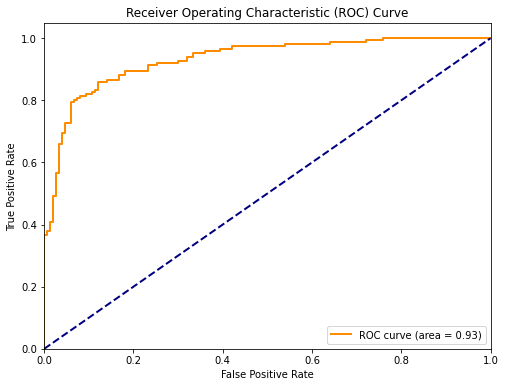

Validation Loss: 0.3301917612552643
Validation Accuracy: 0.8642857074737549
Test Loss: 0.3638743758201599
Test Accuracy: 0.8633333444595337
ROC AUC: 0.9309333333333334
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [78]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 22s 1s/step - loss: 0.1128 - accuracy: 0.9589 - val_loss: 0.3620 - val_accuracy: 0.8571
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.1025 - accuracy: 0.9679 - val_loss: 0.3767 - val_accuracy: 0.8429
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 0.1015 - accuracy: 0.9714 - val_loss: 0.3832 - val_accuracy: 0.8429
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 0.0995 - accuracy: 0.9679 - val_loss: 0.3622 - val_accuracy: 0.8500
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 0.0945 - accuracy: 0.9750 - val_loss: 0.3390 - val_accuracy: 0.8857
Epoch 6/200
18/18 [==============================] - 22s 1s/step - loss: 0.0900 - accuracy: 0.9714 - val_loss: 0.3448 - val_accuracy: 0.8786
Epoch 7/200
18/18 [==============================] - 22s 1s/step - loss: 0.0821 - accuracy: 0.9786 - val_loss: 0.3494 - val_accuracy: 0.8786
Epoch 8/200
1

5/5 [==============================] - 4s 860ms/step
Inference Time: 4.563507318496704 seconds
10/10 [==============================] - 9s 935ms/step


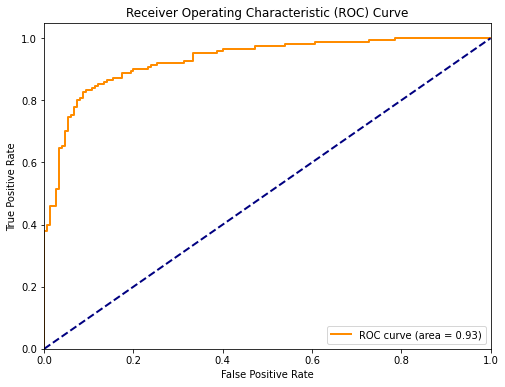

Validation Loss: 0.33900004625320435
Validation Accuracy: 0.8857142925262451
Test Loss: 0.38990962505340576
Test Accuracy: 0.8633333444595337
ROC AUC: 0.9297333333333334
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Attention Mechanism+Dense

In [80]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Define custom attention layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        x, alpha = inputs
        return tf.reduce_sum(x * tf.expand_dims(alpha, -1), axis=1)

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Global average pooling
x = GlobalAveragePooling2D()(x)

# Dense layer
x = Dense(1024, activation='relu')(x)

# Attention mechanism
alpha = Dense(1, activation='softmax')(x)
context = AttentionLayer()([x, alpha])

# Dense layer after attention
x = Dense(512, activation='relu')(context)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_16 (ZeroPad  (None, 230, 230, 3)          0         ['input_9[0][0]']             
 ding2D)                                                                                          
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_16[0][0]']   
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [81]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 27s 1s/step - loss: 6.5796 - accuracy: 0.4732 - val_loss: 5.2358 - val_accuracy: 0.5500
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 3.9722 - accuracy: 0.4696 - val_loss: 4.9499 - val_accuracy: 0.4500
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 2.2877 - accuracy: 0.4982 - val_loss: 0.8433 - val_accuracy: 0.4214
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 2.0169 - accuracy: 0.4518 - val_loss: 0.8161 - val_accuracy: 0.5214
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 1.3973 - accuracy: 0.5232 - val_loss: 0.8605 - val_accuracy: 0.5500
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 1.3491 - accuracy: 0.4982 - val_loss: 0.9280 - val_accuracy: 0.5071
Epoch 7/50
18/18 [==============================] - 22s 1s/step - loss: 0.9745 - accuracy: 0.5196 - val_loss: 0.8425 - val_accuracy: 0.5071
Epoch 8/50
18/18 [==

5/5 [==============================] - 5s 840ms/step
Inference Time: 5.4901909828186035 seconds
10/10 [==============================] - 9s 932ms/step


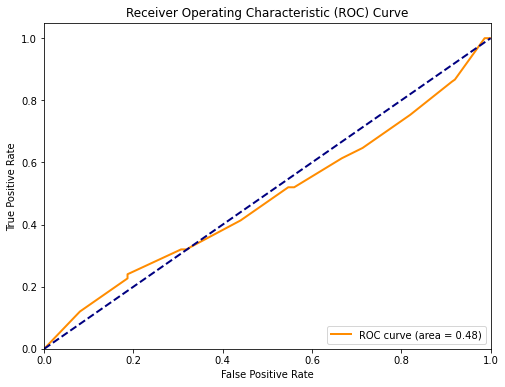

Validation Loss: 0.8160531520843506
Validation Accuracy: 0.5214285850524902
Test Loss: 1.0216633081436157
Test Accuracy: 0.4866666793823242
ROC AUC: 0.48306666666666664
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [83]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 22s 1s/step - loss: 1.1259 - accuracy: 0.4982 - val_loss: 0.7989 - val_accuracy: 0.5214
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 1.2015 - accuracy: 0.5196 - val_loss: 3.4135 - val_accuracy: 0.4500
Epoch 3/100
18/18 [==============================] - 22s 1s/step - loss: 2.2185 - accuracy: 0.5304 - val_loss: 2.1154 - val_accuracy: 0.4500
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 1.3775 - accuracy: 0.5446 - val_loss: 0.8336 - val_accuracy: 0.5071
Epoch 5/100
18/18 [==============================] - 22s 1s/step - loss: 1.4952 - accuracy: 0.5268 - val_loss: 1.5500 - val_accuracy: 0.5500
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 1.5397 - accuracy: 0.5375 - val_loss: 1.3547 - val_accuracy: 0.5500
Training Time: 132.5354244709015 seconds


5/5 [==============================] - 4s 838ms/step
Inference Time: 4.446270227432251 seconds
10/10 [==============================] - 9s 927ms/step


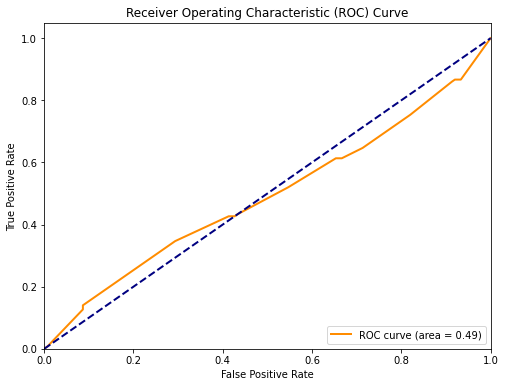

Validation Loss: 0.7989091873168945
Validation Accuracy: 0.5214285850524902
Test Loss: 0.9789636135101318
Test Accuracy: 0.4866666793823242
ROC AUC: 0.4921333333333333
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [85]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 22s 1s/step - loss: 1.1112 - accuracy: 0.5518 - val_loss: 1.0282 - val_accuracy: 0.5500
Epoch 2/150
18/18 [==============================] - 22s 1s/step - loss: 1.6139 - accuracy: 0.4911 - val_loss: 0.9697 - val_accuracy: 0.5357
Epoch 3/150
18/18 [==============================] - 22s 1s/step - loss: 1.6229 - accuracy: 0.4982 - val_loss: 1.3506 - val_accuracy: 0.5500
Epoch 4/150
18/18 [==============================] - 22s 1s/step - loss: 1.2698 - accuracy: 0.5268 - val_loss: 1.0218 - val_accuracy: 0.5357
Epoch 5/150
18/18 [==============================] - 22s 1s/step - loss: 1.1415 - accuracy: 0.4982 - val_loss: 0.8225 - val_accuracy: 0.5071
Epoch 6/150
18/18 [==============================] - 22s 1s/step - loss: 0.8584 - accuracy: 0.4732 - val_loss: 0.8148 - val_accuracy: 0.5071
Epoch 7/150
18/18 [==============================] - 22s 1s/step - loss: 0.7627 - accuracy: 0.5089 - val_loss: 1.4287 - val_accuracy: 0.4500
Epoch 8/150
1

5/5 [==============================] - 4s 839ms/step
Inference Time: 4.465932607650757 seconds
10/10 [==============================] - 9s 932ms/step


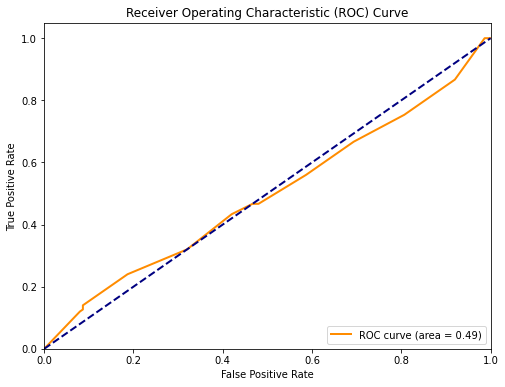

Validation Loss: 0.8147904276847839
Validation Accuracy: 0.5071428418159485
Test Loss: 0.8062949180603027
Test Accuracy: 0.5266666412353516
ROC AUC: 0.4948444444444445
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [87]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 22s 1s/step - loss: 0.8688 - accuracy: 0.5339 - val_loss: 0.7786 - val_accuracy: 0.5071
Epoch 2/200
18/18 [==============================] - 22s 1s/step - loss: 0.9089 - accuracy: 0.4982 - val_loss: 2.9470 - val_accuracy: 0.4500
Epoch 3/200
18/18 [==============================] - 22s 1s/step - loss: 1.3992 - accuracy: 0.5375 - val_loss: 1.4992 - val_accuracy: 0.5500
Epoch 4/200
18/18 [==============================] - 22s 1s/step - loss: 1.0807 - accuracy: 0.5482 - val_loss: 1.0427 - val_accuracy: 0.5500
Epoch 5/200
18/18 [==============================] - 22s 1s/step - loss: 1.1632 - accuracy: 0.5625 - val_loss: 2.1917 - val_accuracy: 0.4500
Epoch 6/200
18/18 [==============================] - 22s 1s/step - loss: 2.1537 - accuracy: 0.4554 - val_loss: 1.3915 - val_accuracy: 0.4500
Training Time: 132.84937739372253 seconds


5/5 [==============================] - 4s 842ms/step
Inference Time: 4.461419105529785 seconds
10/10 [==============================] - 9s 933ms/step


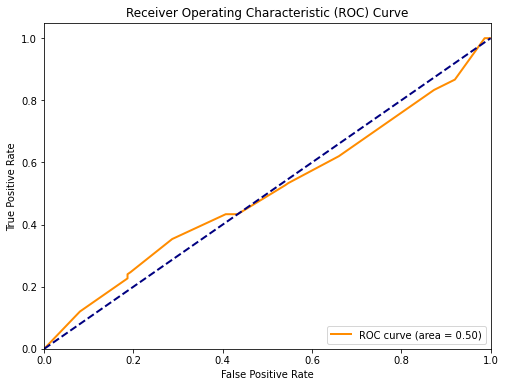

Validation Loss: 0.7785502672195435
Validation Accuracy: 0.5071428418159485
Test Loss: 0.7691743969917297
Test Accuracy: 0.5333333611488342
ROC AUC: 0.5019999999999999
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Capsule network+Dense

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201

import tensorflow as tf

class CapsuleLayer(tf.keras.layers.Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Flatten the output of DenseNet
x = Flatten()(x)

# Reshape to fit Capsule Layer
x = Reshape((-1, x.shape[-1]))(x)

# Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16

# Flatten the output
capsule = Flatten()(capsule)

# Dense layer after Capsule Network
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 conv4_block25_0_bn (BatchN  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 ormalizat

                                                                                                  
 conv4_block28_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block28_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block28_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block28_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block28_concat (Conc  (None, 14, 14, 1152)         0         ['conv4_block27_concat[0][0]',
 atenate)                                                            'conv4_block28_2_conv[0][0]']
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block32_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block32_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block32_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block32_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block32_concat (Conc  (None, 14, 14, 1280)         0         ['conv4_block31_concat[0][0]',
 atenate)                                                            'conv4_block32_2_conv[0][0]']
          

 conv4_block36_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block36_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block36_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block36_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block36_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block36_concat (Conc  (None, 14, 14, 1408)         0         ['conv4_block35_concat[0][0]',
 atenate) 

                                                                                                  
 conv4_block40_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block40_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block40_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block40_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block40_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block40_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block44_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block44_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block44_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block44_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block44_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block44_1_relu[0][0]']
 2D)                                                                                              
          

 conv4_block48_1_conv (Conv  (None, 14, 14, 128)          225280    ['conv4_block48_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block48_1_bn (BatchN  (None, 14, 14, 128)          512       ['conv4_block48_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block48_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block48_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block48_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block48_1_relu[0][0]']
 2D)      

 D)                                                                                               
                                                                                                  
 conv5_block3_concat (Conca  (None, 7, 7, 992)            0         ['conv5_block2_concat[0][0]', 
 tenate)                                                             'conv5_block3_2_conv[0][0]'] 
                                                                                                  
 conv5_block4_0_bn (BatchNo  (None, 7, 7, 992)            3968      ['conv5_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 992)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
          

 conv5_block7_2_conv (Conv2  (None, 7, 7, 32)             36864     ['conv5_block7_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block7_concat (Conca  (None, 7, 7, 1120)           0         ['conv5_block6_concat[0][0]', 
 tenate)                                                             'conv5_block7_2_conv[0][0]'] 
                                                                                                  
 conv5_block8_0_bn (BatchNo  (None, 7, 7, 1120)           4480      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 1120)           0         ['conv5_block8_0_bn[0][0]']   
 ation)   

                                                                                                  
 conv5_block11_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block11_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block11_concat (Conc  (None, 7, 7, 1248)           0         ['conv5_block10_concat[0][0]',
 atenate)                                                            'conv5_block11_2_conv[0][0]']
                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 1248)           4992      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

 vation)                                                                                          
                                                                                                  
 conv5_block15_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block15_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block15_concat (Conc  (None, 7, 7, 1376)           0         ['conv5_block14_concat[0][0]',
 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 1376)           5504      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
          

 conv5_block19_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block19_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block19_concat (Conc  (None, 7, 7, 1504)           0         ['conv5_block18_concat[0][0]',
 atenate)                                                            'conv5_block19_2_conv[0][0]']
                                                                                                  
 conv5_block20_0_bn (BatchN  (None, 7, 7, 1504)           6016      ['conv5_block19_concat[0][0]']
 ormalizat

                                                                                                  
 conv5_block23_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block23_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block23_concat (Conc  (None, 7, 7, 1632)           0         ['conv5_block22_concat[0][0]',
 atenate)                                                            'conv5_block23_2_conv[0][0]']
                                                                                                  
 conv5_blo

 ormalization)                                                                                    
                                                                                                  
 conv5_block27_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block27_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block27_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block27_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block27_concat (Conc  (None, 7, 7, 1760)           0         ['conv5_block26_concat[0][0]',
 atenate)                                                            'conv5_block27_2_conv[0][0]']
          

 conv5_block31_1_bn (BatchN  (None, 7, 7, 128)            512       ['conv5_block31_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block31_1_relu (Acti  (None, 7, 7, 128)            0         ['conv5_block31_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block31_2_conv (Conv  (None, 7, 7, 32)             36864     ['conv5_block31_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_block31_concat (Conc  (None, 7, 7, 1888)           0         ['conv5_block30_concat[0][0]',
 atenate) 

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
18/18 [==============================] - 39s 2s/step - loss: 0.6731 - accuracy: 0.5875 - val_loss: 0.6421 - val_accuracy: 0.6429
Epoch 2/50
18/18 [==============================] - 35s 2s/step - loss: 0.5795 - accuracy: 0.7768 - val_loss: 0.5190 - val_accuracy: 0.8000
Epoch 3/50
18/18 [==============================] - 35s 2s/step - loss: 0.4315 - accuracy: 0.8482 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 4/50
18/18 [==============================] - 35s 2s/step - loss: 0.3442 - accuracy: 0.8875 - val_loss: 0.3696 - val_accuracy: 0.8714
Epoch 5/50
18/18 [==============================] - 35s 2s/step - loss: 0.2716 - accuracy: 0.9250 - val_loss: 0.4269 - val_accuracy: 0.8214
Epoch 6/50
18/18 [==============================] - 35s 2s/step - loss: 0.1807 - accuracy: 0.9625 - val_loss: 0.3788 - val_accuracy: 0.8286
Epoch 7/50
18/18 [==============================] - 35s 2s/step - loss: 0.1383 - accuracy: 0.9768 - val_loss: 0.3308 - val_accuracy: 0.8929
Epoch 8/50
18/18 [==

5/5 [==============================] - 6s 1s/step
Inference Time: 6.448948383331299 seconds
10/10 [==============================] - 11s 1s/step


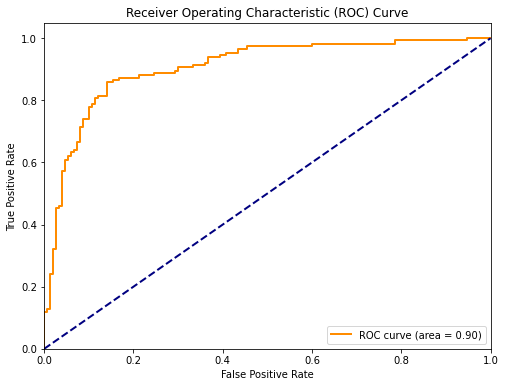

Validation Loss: 0.3308349549770355
Validation Accuracy: 0.8928571343421936
Test Loss: 0.4350495934486389
Test Accuracy: 0.8233333230018616
ROC AUC: 0.9046666666666666
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
18/18 [==============================] - 35s 2s/step - loss: 0.1314 - accuracy: 0.9714 - val_loss: 0.3439 - val_accuracy: 0.8500
Epoch 2/100
18/18 [==============================] - 35s 2s/step - loss: 0.1215 - accuracy: 0.9768 - val_loss: 0.4665 - val_accuracy: 0.8143
Epoch 3/100
18/18 [==============================] - 35s 2s/step - loss: 0.0741 - accuracy: 0.9946 - val_loss: 0.5089 - val_accuracy: 0.8214
Epoch 4/100
18/18 [==============================] - 35s 2s/step - loss: 0.0767 - accuracy: 0.9875 - val_loss: 0.4511 - val_accuracy: 0.8429
Epoch 5/100
18/18 [==============================] - 35s 2s/step - loss: 0.1036 - accuracy: 0.9804 - val_loss: 0.4243 - val_accuracy: 0.8429
Epoch 6/100
18/18 [==============================] - 35s 2s/step - loss: 0.0519 - accuracy: 0.9964 - val_loss: 0.4804 - val_accuracy: 0.8357
Training Time: 209.9795844554901 seconds


5/5 [==============================] - 5s 1s/step
Inference Time: 5.54242467880249 seconds
10/10 [==============================] - 12s 1s/step


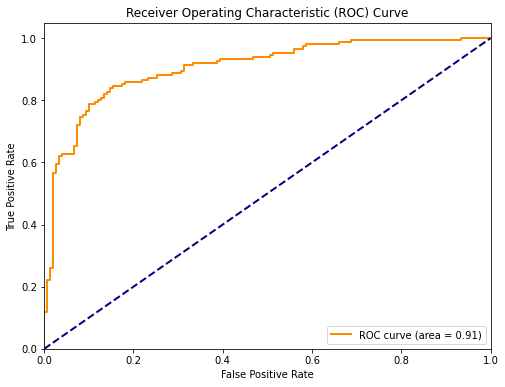

Validation Loss: 0.3438926041126251
Validation Accuracy: 0.8500000238418579
Test Loss: 0.3990107476711273
Test Accuracy: 0.8366666436195374
ROC AUC: 0.9050222222222222
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
18/18 [==============================] - 36s 2s/step - loss: 0.0843 - accuracy: 0.9964 - val_loss: 0.4178 - val_accuracy: 0.8429
Epoch 2/150
18/18 [==============================] - 34s 2s/step - loss: 0.0642 - accuracy: 0.9982 - val_loss: 0.4383 - val_accuracy: 0.8500
Epoch 3/150
18/18 [==============================] - 35s 2s/step - loss: 0.0514 - accuracy: 0.9982 - val_loss: 0.4611 - val_accuracy: 0.8429
Epoch 4/150
18/18 [==============================] - 35s 2s/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 0.4921 - val_accuracy: 0.8500
Epoch 5/150
18/18 [==============================] - 35s 2s/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.5129 - val_accuracy: 0.8500
Epoch 6/150
18/18 [==============================] - 35s 2s/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.5213 - val_accuracy: 0.8500
Training Time: 210.48417830467224 seconds


5/5 [==============================] - 5s 1s/step
Inference Time: 5.5621888637542725 seconds
10/10 [==============================] - 12s 1s/step


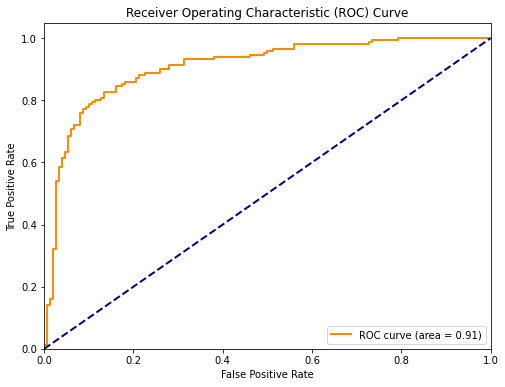

Validation Loss: 0.41778892278671265
Validation Accuracy: 0.8428571224212646
Test Loss: 0.4471416771411896
Test Accuracy: 0.8333333134651184
ROC AUC: 0.9078666666666667
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
18/18 [==============================] - 35s 2s/step - loss: 0.0664 - accuracy: 0.9964 - val_loss: 0.5585 - val_accuracy: 0.8071
Epoch 2/200
18/18 [==============================] - 35s 2s/step - loss: 0.0645 - accuracy: 0.9911 - val_loss: 0.3761 - val_accuracy: 0.8643
Epoch 3/200
18/18 [==============================] - 35s 2s/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.4887 - val_accuracy: 0.8286
Epoch 4/200
18/18 [==============================] - 35s 2s/step - loss: 0.0389 - accuracy: 1.0000 - val_loss: 0.4665 - val_accuracy: 0.8500
Epoch 5/200
18/18 [==============================] - 35s 2s/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.5009 - val_accuracy: 0.8500
Epoch 6/200
18/18 [==============================] - 35s 2s/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.5129 - val_accuracy: 0.8500
Epoch 7/200
18/18 [==============================] - 35s 2s/step - loss: 0.0267 - accuracy: 1.0000 - val_loss: 0.5227 - val_accuracy: 0.8500
Training Time

5/5 [==============================] - 5s 1s/step
Inference Time: 5.564674377441406 seconds
10/10 [==============================] - 12s 1s/step


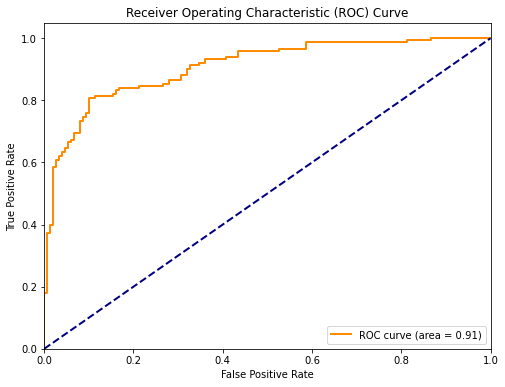

Validation Loss: 0.37606167793273926
Validation Accuracy: 0.8642857074737549
Test Loss: 0.47320079803466797
Test Accuracy: 0.8299999833106995
ROC AUC: 0.907688888888889
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
[[150   0]
 [150   0]]
Metrics saved successfully


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")